NAIVE BAYES

In [ ]:
#Naive Bayes is a family of simple yet effective probabilistic classifiers based on Bayes' Theorem, with the "naive" assumption that features are independent given the class label. It is widely used for classification tasks, especially in text classification and spam detection.

**Types of Naive Bayes Classifiers:**

1. **Gaussian Naive Bayes**:  
    Assumes that the features follow a normal (Gaussian) distribution. Commonly used when features are continuous.

2. **Multinomial Naive Bayes**:  
    Suitable for discrete features, such as word counts in text classification. It models the distribution of features as multinomial.

3. **Bernoulli Naive Bayes**:  
    Designed for binary/boolean features. It models each feature as being present or absent.

Each type of Naive Bayes classifier is best suited for different types of data and applications.

SyntaxError: unterminated string literal (detected at line 1) (3903670599.py, line 1)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#load the dataset
data = pd.read_csv(r'D:\PYTHON\Edunet2.0\day-7\ecosystem_data.csv')
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [4]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [5]:
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy': 1, 'at risk': 0, 'degraded': 2})
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,2
1,95.071431,99.873629,0.184512,45.929245,4.021498,2
2,73.199394,52.846174,0.346640,96.449852,4.194976,2
3,59.865848,182.180001,0.663281,21.897845,4.493691,2
4,15.601864,142.987248,0.482089,58.785642,4.620093,2
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,2
9996,89.750884,14.044187,0.747824,76.452694,4.744065,0
9997,94.670792,91.109541,0.019456,26.956943,7.619473,2
9998,39.748799,132.996002,0.401005,43.431977,6.365560,2


In [6]:
X = data[['water_quality','air_quality_index','biodiversity_index','vegetation_cover','soil_ph']]
y = data['ecosystem_health']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Train the classifier
gnb.fit(X_train, y_train)
# Make predictions on the test set
y_pred = gnb.predict(X_test)
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 95.15%


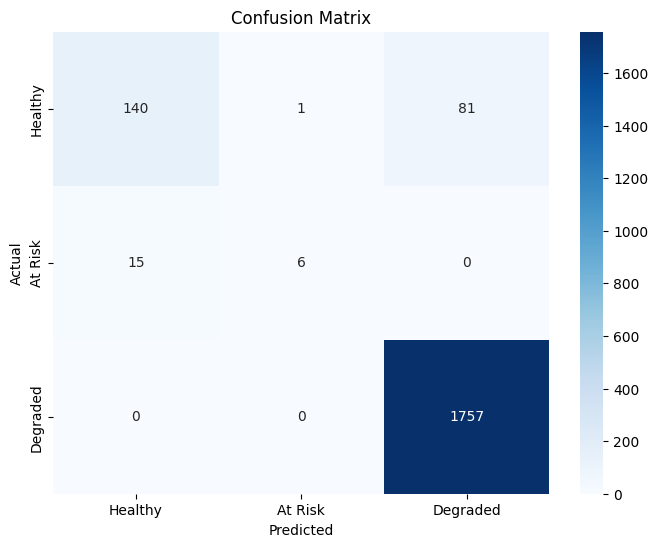

In [8]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'At Risk', 'Degraded'], yticklabels=['Healthy', 'At Risk', 'Degraded'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [9]:
#save the model 
import joblib
joblib.dump(gnb, 'ecosystem_health_model.pkl')


['ecosystem_health_model.pkl']

In [11]:
wq = float(input("Enter water quality index: "))
aqi = float(input("Enter air quality index: "))
biodiversity = float(input("Enter biodiversity index: "))
veg_cover = float(input("Enter vegetation cover index: "))
soil_ph = float(input("Enter soil pH index: "))
# Predict the ecosystem health based on user input
user_input = np.array([[wq, aqi, biodiversity, veg_cover, soil_ph]])
predicted_health = gnb.predict(user_input)
print("Predicted Ecosystem Health:")
if predicted_health == 1:
    print("Healthy")
elif predicted_health == 0:
    print("At Risk")
elif predicted_health == 2:
    print("Degraded")
    



Predicted Ecosystem Health:
Degraded


C:\Users\athar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
